<a href="https://colab.research.google.com/github/samriddhikaswa/ML_PROJECTS_17/blob/main/ML_Bonus_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors

In [ ]:
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

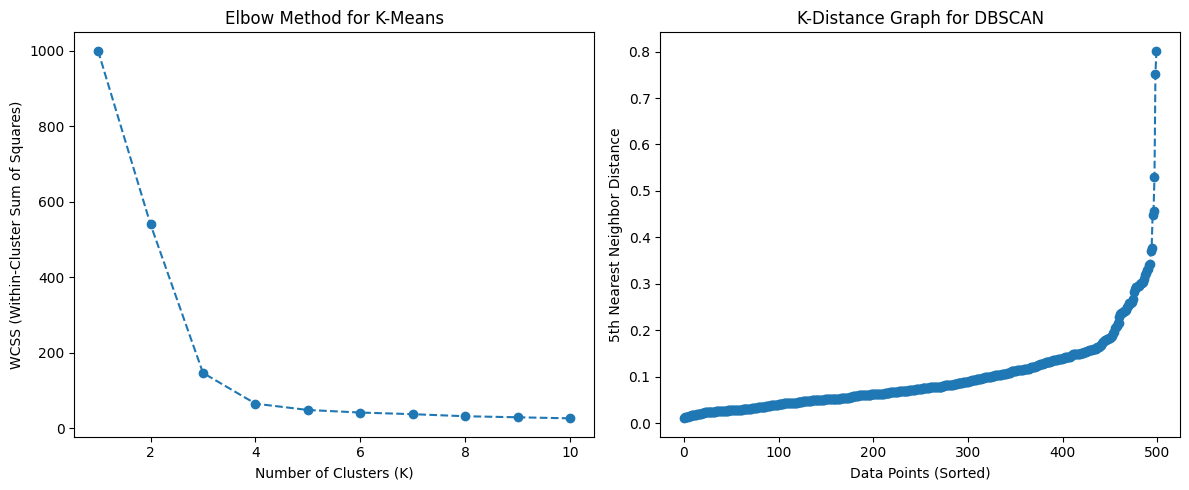

In [ ]:
# Step 2: Plot Elbow Graph for K-Means and K-Distance Graph for DBSCAN
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Finding the optimal eps value for DBSCAN using K-Distance Graph
nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(X_scaled)
distances, _ = neighbors.kneighbors(X_scaled)
sorted_distances = np.sort(distances[:, -1])

plt.figure(figsize=(12, 5))

# Plot Elbow Graph
plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for K-Means')

# Plot K-Distance Graph for DBSCAN
plt.subplot(1, 2, 2)
plt.plot(sorted_distances, marker='o', linestyle='--')
plt.xlabel('Data Points (Sorted)')
plt.ylabel('5th Nearest Neighbor Distance')
plt.title('K-Distance Graph for DBSCAN')
plt.tight_layout()
plt.show()

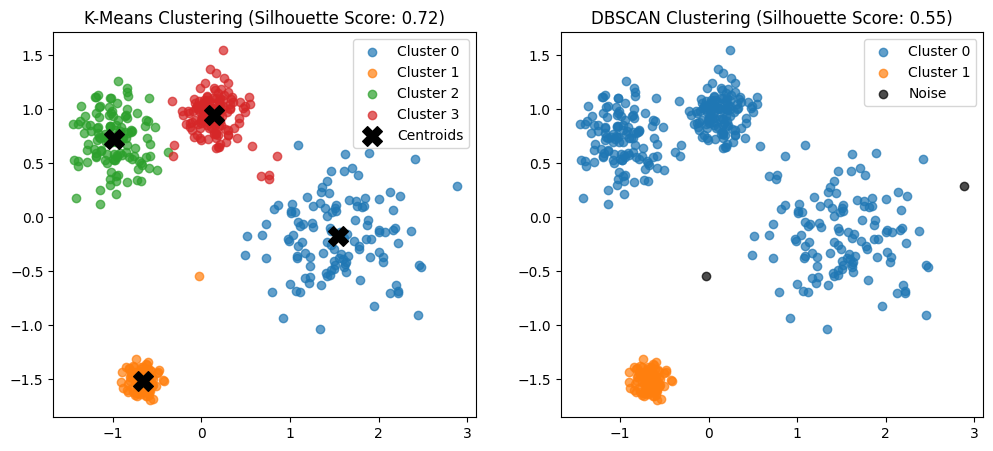

In [ ]:
# Step 3: Apply Clustering and Plot Results

# K-Means Clustering
optimal_k = 4  # Based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# DBSCAN Clustering (Selecting eps based on K-Distance Graph)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Compute silhouette scores
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
dbscan_silhouette = silhouette_score(X_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1]) if len(set(dbscan_labels)) > 1 else -1

# Define distinct colors
colors = list(mcolors.TABLEAU_COLORS.values())

plt.figure(figsize=(12, 5))

# K-Means clustering plot with distinct colors
plt.subplot(1, 2, 1)
for i in range(optimal_k):
    plt.scatter(X_scaled[kmeans_labels == i, 0], X_scaled[kmeans_labels == i, 1],
                color=colors[i % len(colors)], label=f'Cluster {i}', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='black', marker='X', s=200, label='Centroids')  # Keep centroids in black
plt.title(f'K-Means Clustering (Silhouette Score: {kmeans_silhouette:.2f})')
plt.legend()

# DBSCAN clustering plot with distinct colors
plt.subplot(1, 2, 2)
unique_labels = set(dbscan_labels)
for label in unique_labels:
    if label == -1:
        color = 'black'  # Black for noise
        label_name = 'Noise'
    else:
        color = colors[label % len(colors)]  # Assign distinct colors
        label_name = f'Cluster {label}'
    plt.scatter(X_scaled[dbscan_labels == label, 0], X_scaled[dbscan_labels == label, 1],
                color=color, label=label_name, alpha=0.7)  # No edge color

plt.title(f'DBSCAN Clustering (Silhouette Score: {dbscan_silhouette:.2f})')
plt.legend()
plt.show()


In [ ]:
# Step 4: Provide Recommendations
print(f"K-Means Silhouette Score: {kmeans_silhouette:.2f}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.2f}")
print("\nAnalysis:")
print("- K-Means performs well when clusters are compact and well-separated.")
print("- DBSCAN is useful when clusters have irregular shapes and there is noise (outliers).")
print("\nRecommendation for Retail Marketing:")
if kmeans_silhouette > dbscan_silhouette:
    print("- K-Means is better for customer segmentation if the business needs well-defined groups (e.g., budget vs. premium customers).")
else:
    print("- DBSCAN is better if the data contains noise or varying densities (e.g., detecting unique shopping patterns and outliers).")

K-Means Silhouette Score: 0.72
DBSCAN Silhouette Score: 0.55

Analysis:
- K-Means performs well when clusters are compact and well-separated.
- DBSCAN is useful when clusters have irregular shapes and there is noise (outliers).

Recommendation for Retail Marketing:
- K-Means is better for customer segmentation if the business needs well-defined groups (e.g., budget vs. premium customers).
